In [1]:
# Set up with all necessary packages
import numpy as np
import math
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy.stats as sps
%matplotlib inline

In [11]:
class prob1:
    def intercept(self):
        # Calculate the x-intercept (when y=0)
        negative = np.arange(-5, -6, -0.01)
        positive = np.arange(5, 6, 0.01)
        y = 0
        negx = []
        posx = []
        for x in negative:
            if math.sqrt((x+3)**2+y**2)+math.sqrt(x**2+y**2)+math.sqrt((x-3)**2+y**2) <= 17:
                negx.append(x)
        for x in positive:
            if math.sqrt((x+3)**2+y**2)+math.sqrt(x**2+y**2)+math.sqrt((x-3)**2+y**2) <= 17:
                posx.append(x)
        self.negxint = min(negx)
        self.posxint = max(posx)
        
        # Calculate the y-intercept (when x=0)
        posy = []
        negy = []
        x = 0
        for i in negative:
            if math.sqrt((x+3)**2+i**2)+math.sqrt(x**2+i**2)+math.sqrt((x-3)**2+i**2) <= 17:
                negy.append(i)
        for i in positive:
            if math.sqrt((x+3)**2+i**2)+math.sqrt(x**2+i**2)+math.sqrt((x-3)**2+i**2) <= 17:
                posy.append(i)
        self.negyint = min(negy)
        self.posyint = max(posy)
   
    def sample(self, N=4*10**5):
        self.N = N
        self.x_vals = []
        self.y_vals = []
        self.accept = []
        for i in range(N):
            self.x_vals.append(np.random.uniform(self.negxint-0.25, self.posxint+0.25))
            self.y_vals.append(np.random.uniform(self.negyint-0.25, self.posyint+0.25))
        for n in range(len(self.x_vals)):
            accept = ((math.sqrt((self.x_vals[n]+3)**2+self.y_vals[n]**2)+math.sqrt(self.x_vals[n]**2+self.y_vals[n]**2)+math.sqrt((self.x_vals[n]-3)**2+self.y_vals[n]**2)) <= 17)
            self.accept.append(accept)
            
    def draw(self):
        f = plt.figure(figsize=(5,5)) # make a figure
        ax = f.add_subplot(111)
        # Make the rectangle 0.25 bigger than the ellipse
        box = mpl.patches.Rectangle((self.negxint-0.25, self.negyint-0.25), 0.5+self.posxint-self.negxint, 0.5+self.posyint-self.negyint, fill=False, transform=ax.transData, linestyle='-', color='blue')
        ax.add_patch(box)
        # Set x and y limits
        ax.set_xlim([-7, 7])
        ax.set_ylim([-7, 7])
        ax.spines['left'].set_position('center')
        ax.spines['right'].set_color('none')
        ax.spines['bottom'].set_position('center')
        ax.spines['top'].set_color('none')
        # Plot the points based on whether it satisfies the equation or not
        for i in range(len(self.x_vals)):
            if self.accept[i] == True:
                ax.plot(self.x_vals[i], self.y_vals[i], 'r.', markersize=5)
            else:
                ax.plot(self.x_vals[i], self.y_vals[i], 'b.', markersize=5)
    
    def ratio(self):
        true = 0
        total = len(self.accept)
        for i in range(len(self.accept)):
            if self.accept[i] == True:
                true += 1
        self.calculated_ratio = true / total
        
    def calculate_area(self):
        area = ((self.posyint+0.25)-(self.negyint-0.25))*((self.posxint+0.25)-(self.negxint-0.25))
        #print("The area of the rectangle is:", area)
        #print("The estimated area of the shape is:", area*self.ratio)
        self.shape_area = area*self.calculated_ratio
        return(self.shape_area)
    
    def plot_results(self, R=100):
        list_of_areas = []
        self.intercept()
        for i in range(R):
            self.sample()
            self.ratio()
            current = self.calculate_area()
            list_of_areas.append(current)
        plt.hist(list_of_areas)
        average = np.sum(list_of_areas) / R
        print("The calculated average when N =", self.N, "is", average)
        standev = np.std(list_of_areas)
        print("The standard deviation is", standev)
        sem = standev/(math.sqrt(R))
        print("The standard error of the mean", sem)

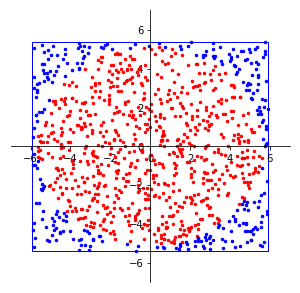

In [8]:
# Assumin N=1000...
test = prob1()
test.intercept()
test.sample()
test.draw()

The calculated average when N = 400000 is 90.92113571492975
The standard deviation is 0.09020078554975015
The standard error of the mean 0.009020078554975015


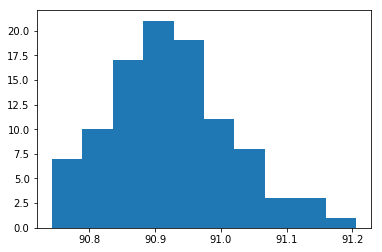

In [12]:
# Assuming N=4*10**5...
test = prob1()
test.intercept()
test.sample()
test.plot_results()

In [13]:
import numpy as np
import pandas as pd

class set_up:
    def set_params(self):
        print("Please type the number of rows:")
        self.m = int(input("m = "))
        print("Please type the number of columns:")
        self.n = int(input('n = '))
        print("Please type the number of marks to win:")
        self.k = int(input("k = "))
        while self.k > self.m and self.k > self.n:
            print("k must be less either m or n. Please try again.")
            self.k = int(input("k = "))
        print("Please type level of computer intelligence, 0, 1, or 2:")
        self.intel = int(input("AI = "))
        
    def print_board(self):
        pretty_board = pd.DataFrame(self.board, range(self.m), range(self.n))
        print(pretty_board)
    
    def choose_player(self):
        self.set_params()
        self.blank = '-'
        self.board = np.full((self.m, self.n), self.blank)
        self.print_board()
        self.rand_start = np.random.random()
        if self.rand_start < 0.5:
            print("User makes the first move! You will be 'X'.")
            self.user_mark = 'X'
            self.comp_mark = 'O'
            return True
        else:
            print("Computer makes the first move! You will be 'O'.")
            self.user_mark = 'O'
            self.comp_mark = 'X'
            return False

In [14]:
# actual game (wrote this first)
class play_game(set_up):
    def start(self):
        # Decide which program to run based on which player goes first
        x = set_up.choose_player(self)
        if x == True:
            self.user_first()
        elif x == False:
            self.comp_first()
    
    def user_turn(self):
        # Asks user for input, returns the user's move
        self.x_move = int(input("\nPlease type the row of your move:"))
        self.y_move = int(input("Please type the column of your move:"))
        self.userturn = (self.x_move, self.y_move)
        
    def com_turn(self):
        # Assuming AI level = 0, computer makes moves at random.
        self.x_coord = np.random.randint(0,self.m)
        self.y_coord = np.random.randint(0,self.n)
        self.compturn = (self.x_coord, self.y_coord)
    
    def win(self):
        pos = (self.board == self.active_mark) # Check for most recent player's marks
        # Check columns
        # If column length is equal to k, check entire column.
        if self.m == self.k:
            for i in range(self.m):
                if pos[i,:].sum() == self.k: return True
        # If k is different from column length, iterate length k through each column
        elif self.m > self.k:
            for i in range(self.m):
                for j in range(self.k):
                    if pos[i, j:j+self.k].sum() == self.k: return True
        
        # Check rows
        # If row length is equal to k, check entire row.
        if self.n == self.k:
            for i in range(self.n):
                if pos[:,i].sum() == self.k: return True
        # If k is different from row length, iterate length k through each row
        elif self.n > self.k:
            for i in range(self.n):
                for j in range(self.k):
                    if pos[j:j+self.k, i].sum() == self.k: return True
        
        # Check diagonals
        for i in range(self.m):
            for j in range(self.n):
                mini = np.array(pos[i:i+self.k, j:j+self.k]) # make mini array of boxes to check diagonals.
                if np.sum(np.diagonal(mini)) == self.k: return True
                if np.sum(np.diagonal(mini[:,::-1])) == self.k: return True # the opposite diagonal
        return False     
    
    def user_first(self):
        # Program to run if the user goes first.
        while '-' in self.board: # While there are still empty spots in the board.
            self.user_turn()
            while self.board[self.userturn] != '-': # In case the spot is invalid
                print("Spot already taken! Try again.")
                self.user_turn()
            self.board[self.userturn] = self.user_mark
            self.active_mark = self.user_mark # This line is needed to check for wins
            set_up.print_board(self)
            if self.win() == True:
                print("User won!")
                break
            if '-' not in self.board: # Check again for empty spots
                print("Tie!")
                break
            
            if self.intel == 0:
                self.com_turn()
                while self.board[self.compturn] != '-': # In case the spot is invalid
                    self.com_turn()
            elif self.intel == 1:
                if self.com_turn_level1() == False:
                    self.com_turn()
                    while self.board[self.compturn] != '-': # In case the spot is invalid
                        self.com_turn()
                else:
                    self.com_turn_level1()
            elif self.intel == 2:
                if self.com_turn_level1() == False:
                    if self.com_turn_level2() == False:
                        self.com_turn()
                        while self.board[self.compturn] != '-': # In case the spot is invalid
                            self.com_turn() 
                    else:
                        self.com_turn_level2()
                else:
                    self.com_turn_level1()
            print("\nComputer played at", self.compturn)
            self.board[self.compturn] = self.comp_mark
            set_up.print_board(self)
            self.active_mark = self.comp_mark
            if self.win() == True:
                print("Computer won!")
                break
            if '-' not in self.board:
                print("Tie!")
                break
        print("Game over.")
        self.play_again()
        
    def comp_first(self):
        while '-' in self.board:
            if self.intel == 0:
                self.com_turn()
                while self.board[self.compturn] != '-': # In case the spot is invalid
                    self.com_turn()
            elif self.intel == 1:
                if self.com_turn_level1() == False:
                    self.com_turn()
                    while self.board[self.compturn] != '-': # In case the spot is invalid
                        self.com_turn()
                else:
                    self.com_turn_level1()
            elif self.intel == 2:
                if self.com_turn_level1() == False:
                    if self.com_turn_level2() == False:
                        self.com_turn()
                        while self.board[self.compturn] != '-': # In case the spot is invalid
                            self.com_turn() 
                    else:
                        self.com_turn_level2()
                else:
                    self.com_turn_level1()
            print("\nComputer played at", self.compturn)
            self.board[self.compturn] = self.comp_mark
            set_up.print_board(self)
            self.active_mark = self.comp_mark
            if self.win() == True:
                print("Computer won!")
                break
            if '-' not in self.board:
                print("Tie!")
                break
            
            self.user_turn()
            while self.board[self.userturn] != '-':
                print("Spot already taken! Try again.")
                self.user_turn()
            self.board[self.userturn] = self.user_mark
            set_up.print_board(self)
            self.active_mark = self.user_mark
            if self.win() == True:
                print("User won!")
                break
            if '-' not in self.board:
                print("Tie!")
                break
        print("Game over.")
        self.play_again()
    
        
    def com_turn_level1(self):
        pos = (self.board == self.comp_mark)
        self.coords = {} # Saves the coordinates of the initial grid
        self.grids = {} # Saves the grid subsets
        number = 0
        # Make a dictionary of all of the places with computer marks in them
        # Assigned to the starting index in real grid
        for i in range(self.m):
            for j in range(self.n):
                mini = np.array(pos[i:i+self.k, j:j+self.k])
                if mini.shape == (self.k, self.k) and True in mini:
                    self.coords[number] = [i,j]
                    self.grids[number] = mini
                    number+=1
        if self.check_rows() != False:
            return(self.check_rows())
        elif self.check_columns() != False:
            return(self.check_columns())
        elif self.check_diagonals() != False:
            return(self.check_diagonals())
        else:
            return(False)
    
    def com_turn_level2(self):
        pos = (self.board == self.user_mark)
        self.coords = {}
        self.grids = {}
        number = 0
        for i in range(self.m):
            for j in range(self.n):
                mini = np.array(pos[i:i+self.k, j:j+self.k])
                if mini.shape == (self.k, self.k) and True in mini:
                    self.coords[number] = [i,j]
                    self.grids[number] = mini
                    number+=1
        if self.check_rows() != False:
            return(self.check_rows())
        elif self.check_columns() != False:
            return(self.check_columns())
        elif self.check_diagonals() != False:
            return(self.check_diagonals())
        else:
            return(False)
    
    def check_rows(self):
        for check in self.grids: # For each grid in the dictionary
            for row in range(self.k): # For each row in the grid
                if self.grids[check][row].sum() == self.k-1: # If there is an opportunity to win
                    for position in range(self.k):
                        if self.grids[check][row][position] == False:
                            x_coord = self.coords[check][0]+row
                            y_coord = self.coords[check][1]+position
                            if self.board[x_coord, y_coord] == self.blank:
                                x_play = x_coord
                                y_play = y_coord
                                self.compturn = (x_play, y_play)
                                return(self.compturn)
        return(False)
    
    def check_columns(self):
        # Check the columns
        for check in self.grids: # For each grid in the dictionary
            for row in range(self.k): # For each row in the grid
                for position in range(self.k): # For each column in the grid
                    if self.grids[check][:,position].sum() == self.k-1:
                        if self.grids[check][row][position] == False:
                            x_coord = self.coords[check][0]+row
                            y_coord = self.coords[check][1]+position
                            if self.board[x_coord, y_coord] == self.blank:
                                x_play = x_coord
                                y_play = y_coord
                                self.compturn = (x_play, y_play)
                                return(self.compturn)
        return(False)
    
    def check_diagonals(self):
        # Check the diagonals
        for check in self.grids: # for each grid in the dictionary
            if np.sum(np.diagonal(self.grids[check])) == self.k-1: 
                for i in range(len(np.diagonal(self.grids[check]))):
                    if np.diagonal(self.grids[check])[i] == False:
                        x_coord = self.coords[check][0] + i
                        y_coord = self.coords[check][1] + i
                        if self.board[x_coord, y_coord] == self.blank:
                                x_play = x_coord
                                y_play = y_coord
                                self.compturn = (x_play, y_play)
                                return(self.compturn)
                                break
            if np.sum(np.diagonal(self.grids[check][:,::-1])) == self.k-1: 
                for i in range(len(np.diagonal(self.grids[check][:,::-1]))):
                    if np.diagonal(self.grids[check][:,::-1])[i] == False:
                        x_coord = self.coords[check][0]
                        y_coord = self.coords[check][1]
                        if self.board[x_coord, y_coord] == self.blank:
                                x_play = x_coord
                                y_play = y_coord
                                self.compturn = (x_play, y_play)
                                return(self.compturn)
        return(False)
    
    def play_again(self):
        print('Would you like to play again?')
        decision = input('Please type "yes" or "no": ')
        if decision == 'yes':
            print("Starting new game...\n")
            self.start()
        else:
            print("\nThanks for playing!")
            return(' ')
        
    def one_v_two(self, m=4, n=3, k=3, N=1000):
        self.m = m
        self.n = n
        self.k = k
        self.blank = '-'
        self.board = np.full((m, n), self.blank)
        ai_one = 0
        ai_two = 0
        tie = 0
        start = np.random.random(N)
        for i in range(N):
            if start[i] > 0.5:
                self.board = np.full((m, n), self.blank)
                while '-' in self.board:
                    self.comp_mark = '2'
                    self.user_mark = '1'
                    if self.com_turn_level1() == False:
                        if self.com_turn_level2() == False:
                            self.com_turn()
                            while self.board[self.compturn] != '-': # In case the spot is invalid
                                self.com_turn() 
                        else:
                            self.com_turn_level2()
                    else:
                        self.com_turn_level1()
                    self.board[self.compturn] = self.comp_mark
                    self.active_mark = self.comp_mark
                    if self.win() == True:
                        ai_two +=1
                        break
                    if '-' not in self.board:
                        tie+=1
                        break
                
                    self.comp_mark = '1'
                    self.user_mark = '2'
                    if self.com_turn_level1() == False:
                        self.com_turn()
                        while self.board[self.compturn] != '-': # In case the spot is invalid
                            self.com_turn()
                    else:
                        self.com_turn_level1()
                    self.board[self.compturn] = self.comp_mark
                    self.active_mark = self.comp_mark
                    if self.win() == True:
                        ai_one +=1
                        break
                    if '-' not in self.board:
                        tie += 1
                        break
                
            elif start[i]<0.5:
                self.board = np.full((m, n), self.blank)
                while '-' in self.board:
                    self.comp_mark = '1'
                    self.user_mark = '2'
                    if self.com_turn_level1() == False:
                        self.com_turn()
                        while self.board[self.compturn] != '-': # In case the spot is invalid
                            self.com_turn()
                    else:
                        self.com_turn_level1()
                    self.board[self.compturn] = self.comp_mark
                    self.active_mark = self.comp_mark
                    if self.win() == True:
                        ai_one +=1
                        break
                    if '-' not in self.board:
                        tie +=1
                        break
                    self.comp_mark = '2'
                    self.user_mark = '1'
                    if self.com_turn_level1() == False:
                        if self.com_turn_level2() == False:
                            self.com_turn()
                            while self.board[self.compturn] != '-': # In case the spot is invalid
                                self.com_turn() 
                        else:
                            self.com_turn_level2()
                    else:
                        self.com_turn_level1()
                    self.board[self.compturn] = self.comp_mark
                    self.active_mark = self.comp_mark
                    if self.win() == True:
                        ai_two += 1
                        break
                    if '-' not in self.board:
                        tie += 1
                        break
        print("The probability that AI 1 wins:", ai_one/N)
        print("The probability that AI 2 wins:", ai_two/N)
        
    def one_v_zero(self, m=4, n=3, k=3, N=1000):
        self.m = m
        self.n = n
        self.k = k
        self.blank = '-'
        self.board = np.full((m, n), self.blank)
        ai_one = 0
        ai_zero = 0
        start = np.random.random(N)
        for i in range(N):
            if start[i] > 0.5:
                self.board = np.full((m, n), self.blank)
                while '-' in self.board:
                    self.comp_mark = '1'
                    self.user_mark = '0'
                    if self.com_turn_level1() == False:
                        self.com_turn()
                        while self.board[self.compturn] != '-': # In case the spot is invalid
                            self.com_turn() 
                    else:
                        self.com_turn_level1()
                    self.board[self.compturn] = self.comp_mark
                    self.active_mark = self.comp_mark
                    if self.win() == True:
                        ai_one +=1
                        break
                    if '-' not in self.board:
                        break
                
                    self.comp_mark = '0'
                    self.user_mark = '1'
                    self.com_turn()
                    while self.board[self.compturn] != '-': # In case the spot is invalid
                        self.com_turn()
                    self.board[self.compturn] = self.comp_mark
                    self.active_mark = self.comp_mark
                    if self.win() == True:
                        ai_zero +=1
                        break
                    if '-' not in self.board:
                        break
                
            elif start[i]<0.5:
                self.board = np.full((m, n), self.blank)
                while '-' in self.board:
                    self.comp_mark = '0'
                    self.user_mark = '1'
                    self.com_turn()
                    while self.board[self.compturn] != '-': # In case the spot is invalid
                        self.com_turn()
                    self.board[self.compturn] = self.comp_mark
                    self.active_mark = self.comp_mark
                    if self.win() == True:
                        ai_zero +=1
                        break
                    if '-' not in self.board:
                        break
                    self.comp_mark = '1'
                    self.user_mark = '0'
                    if self.com_turn_level1() == False:
                        self.com_turn()
                        while self.board[self.compturn] != '-': # In case the spot is invalid
                            self.com_turn() 
                    else:
                        self.com_turn_level1()
                    self.board[self.compturn] = self.comp_mark
                    self.active_mark = self.comp_mark
                    if self.win() == True:
                        ai_one += 1
                        break
                    if '-' not in self.board:
                        break
        print("The probability that AI 1 wins:", ai_one/N)
        print("The probability that AI 0 wins:", ai_zero/N)
    
    def two_v_zero(self, m=4, n=3, k=3, N=1000):
        self.m = m
        self.n = n
        self.k = k
        self.blank = '-'
        self.board = np.full((m, n), self.blank)
        ai_zero = 0
        ai_two = 0
        tie = 0
        start = np.random.random(N)
        for i in range(N):
            if start[i] > 0.5:
                self.board = np.full((m, n), self.blank)
                while '-' in self.board:
                    self.comp_mark = '2'
                    self.user_mark = '0'
                    if self.com_turn_level1() == False:
                        if self.com_turn_level2() == False:
                            self.com_turn()
                            while self.board[self.compturn] != '-': # In case the spot is invalid
                                self.com_turn() 
                        else:
                            self.com_turn_level2()
                    else:
                        self.com_turn_level1()
                    self.board[self.compturn] = self.comp_mark
                    self.active_mark = self.comp_mark
                    if self.win() == True:
                        ai_two +=1
                        break
                    if '-' not in self.board:
                        break
                
                    self.comp_mark = '0'
                    self.user_mark = '2'
                    self.com_turn()
                    while self.board[self.compturn] != '-': # In case the spot is invalid
                        self.com_turn()
                    self.board[self.compturn] = self.comp_mark
                    self.active_mark = self.comp_mark
                    if self.win() == True:
                        ai_zero +=1
                        break
                    if '-' not in self.board:
                        break
                
            elif start[i]<0.5:
                self.board = np.full((m, n), self.blank)
                while '-' in self.board:
                    self.comp_mark = '0'
                    self.user_mark = '2'
                    self.com_turn()
                    while self.board[self.compturn] != '-': # In case the spot is invalid
                        self.com_turn()
                    self.board[self.compturn] = self.comp_mark
                    self.active_mark = self.comp_mark
                    if self.win() == True:
                        ai_zero +=1
                        break
                    if '-' not in self.board:
                        break
                    self.comp_mark = '2'
                    self.user_mark = '0'
                    if self.com_turn_level1() == False:
                        if self.com_turn_level2() == False:
                            self.com_turn()
                            while self.board[self.compturn] != '-': # In case the spot is invalid
                                self.com_turn() 
                        else:
                            self.com_turn_level2()
                    else:
                        self.com_turn_level1()
                    self.board[self.compturn] = self.comp_mark
                    self.active_mark = self.comp_mark
                    if self.win() == True:
                        ai_two += 1
                        break
                    if '-' not in self.board:
                        break
        print("The probability that AI 0 wins:", ai_zero/N)
        print("The probability that AI 2 wins:", ai_two/N)

In [15]:
# Test that the AI works
test = play_game()
test.start()

Please type the number of rows:
m = 4
Please type the number of columns:
n = 4
Please type the number of marks to win:
k = 3
Please type level of computer intelligence, 0, 1, or 2:
AI = 2
   0  1  2  3
0  -  -  -  -
1  -  -  -  -
2  -  -  -  -
3  -  -  -  -
User makes the first move! You will be 'X'.

Please type the row of your move:0
Please type the column of your move:0
   0  1  2  3
0  X  -  -  -
1  -  -  -  -
2  -  -  -  -
3  -  -  -  -

Computer played at (2, 1)
   0  1  2  3
0  X  -  -  -
1  -  -  -  -
2  -  O  -  -
3  -  -  -  -

Please type the row of your move:0
Please type the column of your move:1
   0  1  2  3
0  X  X  -  -
1  -  -  -  -
2  -  O  -  -
3  -  -  -  -

Computer played at (0, 2)
   0  1  2  3
0  X  X  O  -
1  -  -  -  -
2  -  O  -  -
3  -  -  -  -

Please type the row of your move:1
Please type the column of your move:1
   0  1  2  3
0  X  X  O  -
1  -  X  -  -
2  -  O  -  -
3  -  -  -  -

Computer played at (2, 2)
   0  1  2  3
0  X  X  O  -
1  -  X  -  -
2  

In [16]:
print("For a 3x3 board, with 3 in a row to win.")
test = play_game()
test.one_v_two()
test.one_v_zero()
test.two_v_zero()

For a 3x3 board, with 3 in a row to win.
The probability that AI 1 wins: 0.249
The probability that AI 2 wins: 0.735
The probability that AI 1 wins: 0.76
The probability that AI 0 wins: 0.235
The probability that AI 0 wins: 0.165
The probability that AI 2 wins: 0.821


In [17]:
print("For a 4x4 board, with 3 in a row to win.")
test = play_game()
test.one_v_two()
test.one_v_zero()
test.two_v_zero()

For a 4x4 board, with 3 in a row to win.
The probability that AI 1 wins: 0.259
The probability that AI 2 wins: 0.72
The probability that AI 1 wins: 0.761
The probability that AI 0 wins: 0.231
The probability that AI 0 wins: 0.165
The probability that AI 2 wins: 0.814


In [18]:
print("For a 4x3 board, with 3 in a row to win.")
test = play_game()
test.one_v_two()
test.one_v_zero()
test.two_v_zero()

For a 4x3 board, with 3 in a row to win.
The probability that AI 1 wins: 0.233
The probability that AI 2 wins: 0.754
The probability that AI 1 wins: 0.749
The probability that AI 0 wins: 0.246
The probability that AI 0 wins: 0.182
The probability that AI 2 wins: 0.797
